In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import math
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
anz=pd.read_csv('anz_master.csv')
anz.head(8)

status  card_present_flag bpay_biller_code         account currency  \
0  authorized                1.0              NaN  ACC-1598451071      AUD   
1  authorized                0.0              NaN  ACC-1598451071      AUD   
2  authorized                1.0              NaN  ACC-1222300524      AUD   
3  authorized                1.0              NaN  ACC-1037050564      AUD   
4  authorized                1.0              NaN  ACC-1598451071      AUD   
5      posted                NaN              NaN  ACC-1608363396      AUD   
6  authorized                1.0              NaN  ACC-2776252858      AUD   
7  authorized                1.0              NaN  ACC-2776252858      AUD   

        long_lat txn_description                           merchant_id  \
0  153.41 -27.95             POS  81c48296-73be-44a7-befa-d053f48ce7cd   
1  153.41 -27.95       SALES-POS  830a451c-316e-4a6a-bf25-e37caedca49e   
2  151.23 -33.94             POS  835c231d-8cdf-4e96-859d-e9d571760cf0   
3  153.10 -27.66       SALES-POS  48514682-c78a-4a88-b0da-2d6302e64673   
4  153.41 -27.95       SALES-POS  b4e02c10-0852-4273-b8fd-7b3395e32eb0   
5  151.22 -33.87         PAYMENT                                   NaN   
6  144.95 -37.76       SALES-POS  3aa18033-a0a9-4190-a117-b7caaf4d07e3   
7  144.95 -37.76             POS  ee58145d-26e8-4b01-9cd9-62378014f21d   

   merchant_code first_name   ...     age merchant_suburb merchant_state  \
0            NaN      Diana   ...      26         Ashmore            QLD   
1            NaN      Diana   ...      26          Sydney            NSW   
2            NaN    Michael   ...      38          Sydney            NSW   
3            NaN     Rhonda   ...      40         Buderim            QLD   
4            NaN      Diana   ...      26   Mermaid Beach            QLD   
5            NaN     Robert   ...      20             NaN            NaN   
6            NaN    Kristin   ...      43        Kalkallo            VIC   
7            NaN    Kristin   ...      43       Melbourne            VIC   

                     extraction  amount                    transaction_id  \
0  2018-08-01T01:01:15.000+0000   16.25  a623070bfead4541a6b0fff8a09e706c   
1  2018-08-01T01:13:45.000+0000   14.19  13270a2a902145da9db4c951e04b51b9   
2  2018-08-01T01:26:15.000+0000    6.42  feb79e7ecd7048a5a36ec889d1a94270   
3  2018-08-01T01:38:45.000+0000   40.90  2698170da3704fd981b15e64a006079e   
4  2018-08-01T01:51:15.000+0000    3.25  329adf79878c4cf0aeb4188b4691c266   
5  2018-08-01T02:00:00.000+0000  163.00  1005b48a6eda4ffd85e9b649dc9467d3   
6  2018-08-01T02:23:04.000+0000   61.06  b79ca208099c4c28aa5dae966096d842   
7  2018-08-01T04:11:25.000+0000   15.61  e1c4a50d6a0549cbb3710a62a2fa00d5   

     country     customer_id  merchant_long_lat movement  
0  Australia  CUS-2487424745      153.38 -27.99    debit  
1  Australia  CUS-2487424745      151.21 -33.87    debit  
2  Australia  CUS-2142601169      151.21 -33.87    debit  
3  Australia  CUS-1614226872      153.05 -26.68    debit  
4  Australia  CUS-2487424745      153.44 -28.06    debit  
5  Australia  CUS-2688605418                NaN    debit  
6  Australia  CUS-4123612273      144.95 -37.53    debit  
7  Australia  CUS-4123612273      144.96 -37.81    debit  

[8 rows x 24 columns]

In [3]:
#1 Checking the dimension of the anz world dataframe
anz.shape

(12043, 24)

In [4]:
#2 Checking the data structure and also if there is missing value in any row in the data frame
anz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 24 columns):
status               12043 non-null object
card_present_flag    7717 non-null float64
bpay_biller_code     885 non-null object
account              12043 non-null object
currency             12043 non-null object
long_lat             12043 non-null object
txn_description      12043 non-null object
merchant_id          7717 non-null object
merchant_code        883 non-null float64
first_name           12043 non-null object
balance              12043 non-null float64
date                 12043 non-null object
month                12043 non-null object
gender               12043 non-null object
age                  12043 non-null int64
merchant_suburb      7717 non-null object
merchant_state       7717 non-null object
extraction           12043 non-null object
amount               12043 non-null float64
transaction_id       12043 non-null object
country              12043 non-null 

In [5]:
#missing data
total = anz.isnull().sum().sort_values(ascending=False)
percent = (anz.isnull().sum()/anz.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

Total   Percent
merchant_code      11160  0.926679
bpay_biller_code   11158  0.926513
card_present_flag   4326  0.359213
merchant_state      4326  0.359213
merchant_suburb     4326  0.359213
merchant_id         4326  0.359213
merchant_long_lat   4326  0.359213
movement               0  0.000000
first_name             0  0.000000
account                0  0.000000
currency               0  0.000000
long_lat               0  0.000000
txn_description        0  0.000000
date                   0  0.000000
balance                0  0.000000
month                  0  0.000000
gender                 0  0.000000
age                    0  0.000000
extraction             0  0.000000
amount                 0  0.000000
transaction_id         0  0.000000
country                0  0.000000
customer_id            0  0.000000
status                 0  0.000000

In [6]:
#Dropping column not importamt to our analysis
#Dropping column with lots of missing values

anz.drop(['merchant_code','bpay_biller_code','card_present_flag','merchant_state','merchant_suburb','merchant_id','merchant_long_lat','account','currency','long_lat','first_name','date','extraction','transaction_id', 'country', 'customer_id'],axis=1,inplace=True)

In [7]:
anz.columns

Index(['status', 'txn_description', 'balance', 'month', 'gender', 'age',
       'amount', 'movement'],
      dtype='object')

Let's analyse this to understand how to handle the missing data.

We'll consider that when more than 15% of the data is missing, we should delete the corresponding variable and pretend it never existed. This means that we will not try any trick to fill the missing data in these cases.

In [8]:
anz.txn_description=anz.txn_description.astype('category')

In [9]:
anz.dtypes

status               object
txn_description    category
balance             float64
month                object
gender               object
age                   int64
amount              float64
movement             object
dtype: object

In [10]:
anz.describe()

balance           age        amount
count   12043.000000  12043.000000  12043.000000
mean    14704.195553     30.582330    187.933588
std     31503.722652     10.046343    592.599934
min         0.240000     18.000000      0.100000
25%      3158.585000     22.000000     16.000000
50%      6432.010000     28.000000     29.000000
75%     12465.945000     38.000000     53.655000
max    267128.520000     78.000000   8835.980000

In [11]:
#I am converting numerical variable to categorical variable using pandas' cut function
anz['ageGroup']=pd.cut(anz.age,[15,25,35,55,85],labels=['young adults', 'adults', 'middle aged', 'old adults'])
anz['ageGroup'].head()

0         adults
1         adults
2    middle aged
3    middle aged
4         adults
Name: ageGroup, dtype: category
Categories (4, object): [young adults < adults < middle aged < old adults]

In [12]:
#Checking the overall counts of customers age categorising them into age groups in the dataset
pd.DataFrame(anz.ageGroup.value_counts())

ageGroup
young adults      4588
adults            3758
middle aged       3473
old adults         224

In [13]:
#Checking if data frame doesn't contain missing values
anz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 9 columns):
status             12043 non-null object
txn_description    12043 non-null category
balance            12043 non-null float64
month              12043 non-null object
gender             12043 non-null object
age                12043 non-null int64
amount             12043 non-null float64
movement           12043 non-null object
ageGroup           12043 non-null category
dtypes: category(2), float64(2), int64(1), object(4)
memory usage: 682.6+ KB


**Creating a new column to the dataset (average transaction amount)**

In [14]:
#Average transaction amount
amt=anz['amount']
avg_tran_amt= amt.sum()/amt.count()
print(avg_tran_amt)

187.933587976


In [15]:
#Checking the variables in our dataset
anz.columns

Index(['status', 'txn_description', 'balance', 'month', 'gender', 'age',
       'amount', 'movement', 'ageGroup'],
      dtype='object')

In [16]:
#Checking unique values in each of our variable in the dataset
anz.nunique()

status                 2
txn_description        6
balance            12006
month                  3
gender                 2
age                   33
amount              4457
movement               2
ageGroup               4
dtype: int64

**Question? What is the best month for transaction?, and how much was earned that month?**

- How many transactions do customers make each month, on average?

In [17]:
new=anz[['amount','month']]

In [18]:
results=new.groupby('month').sum()
results

amount
month               
August     729935.52
October    802798.47
September  730550.21

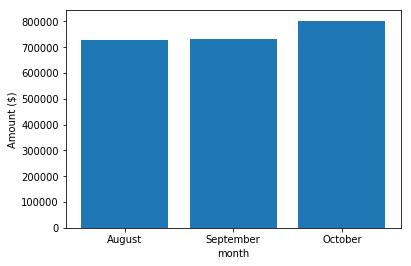

In [19]:
much=new['month'].unique()

plt.bar(much, results['amount'])
plt.xticks(much)
plt.ylabel('Amount ($)')
plt.xlabel('month')
plt.show()

**What way of payment has the highest number of transaction?**

In [20]:
new2=anz[['amount','txn_description']]

In [21]:
results2=new2.groupby('txn_description').sum()
results2

amount
txn_description            
INTER BANK         64331.00
PAY/SALARY       1676576.85
PAYMENT           201794.00
PHONE BANK         10716.00
POS               152861.24
SALES-POS         157005.11

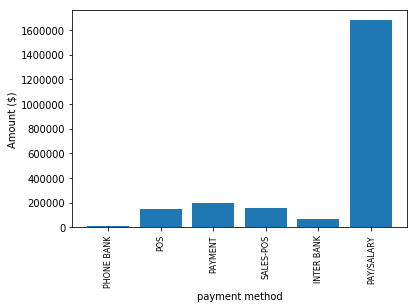

In [22]:
pay=new2['txn_description'].unique()

plt.bar(pay, results2['amount'])
plt.xticks(pay, rotation='vertical',size=8)
plt.ylabel('Amount ($)')
plt.xlabel('payment method')
plt.show()

## EXPLORATION DATA ANALYSIS

**(1) Univariate exploration**

By looking at one variable at a time, we can build an intuition for how each variable is distributed before moving on to more complicated interactions between variables.

Let's start our exploration by looking at the main variable of interest: price. Is the distribution skewed or symmetric? Is it unimodal or multimodal?

In [23]:
#descriptive statistics summary of customers age
anz['age'].describe()

count    12043.000000
mean        30.582330
std         10.046343
min         18.000000
25%         22.000000
50%         28.000000
75%         38.000000
max         78.000000
Name: age, dtype: float64

**Observations**

- We have 12043 customers
- The minimum age of customers is 18 years
- The maximum age of customers is 80 years
- The mean age of customers is 78 years
- While the deviation is of 10 years

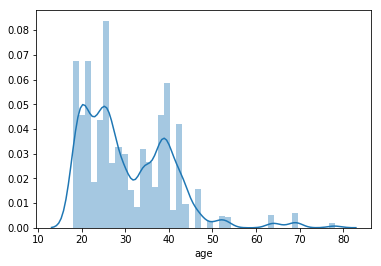

In [24]:
# univariate plot of customers age
sb.distplot(anz['age']);

In [25]:
#descriptive statistics summary of customers balance
anz['balance'].describe()

count     12043.000000
mean      14704.195553
std       31503.722652
min           0.240000
25%        3158.585000
50%        6432.010000
75%       12465.945000
max      267128.520000
Name: balance, dtype: float64

**Observations**

- We have 12043 customers
- The minimum customers balance is 0.24 
- The maximum customers balance is 267128.52 dollars
- The mean customers balance is 14704.195553 dollars
- While the deviation is of 31503.722652 dollars

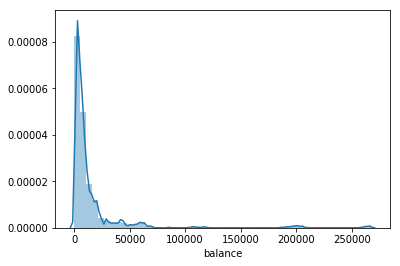

In [26]:
# univariate plot of customers balance
sb.distplot(anz['balance']);

In [27]:
#descriptive statistics summary of customers amount
anz['amount'].describe()

count    12043.000000
mean       187.933588
std        592.599934
min          0.100000
25%         16.000000
50%         29.000000
75%         53.655000
max       8835.980000
Name: amount, dtype: float64

**Observations**

- We have 12043 customers
- The minimum customers amount is 0.1 doll
- The maximum customers amount is 8835.98 dollars
- The mean customers amount is 187.94 dollars
- While the deviation is of 592.6 dollars

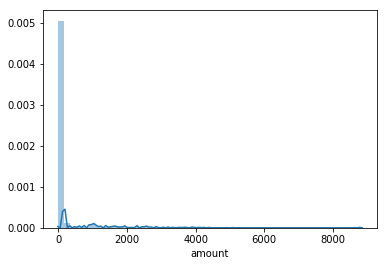

In [28]:
# univariate plot of customers balance
sb.distplot(anz['amount']);

### BAR CHART AND PIE CHART OF QUALITATIVE VARIABLE IN THE DATASET

In [29]:
#Checking counts of gender of the customers
pd.DataFrame(anz.gender.value_counts())

gender
M    6285
F    5758

In [30]:
#Checking counts of status of the customers
pd.DataFrame(anz.status.value_counts())

status
authorized    7717
posted        4326

In [31]:
#Checking counts of movements of the customers
pd.DataFrame(anz.movement.value_counts())

movement
debit      11160
credit       883

In [32]:
#Checking counts of age group of the customers
pd.DataFrame(anz.ageGroup.value_counts())

ageGroup
young adults      4588
adults            3758
middle aged       3473
old adults         224

In [33]:
#Checking counts of payment method of the customers
pd.DataFrame(anz.txn_description.value_counts())

txn_description
SALES-POS              3934
POS                    3783
PAYMENT                2600
PAY/SALARY              883
INTER BANK              742
PHONE BANK              101

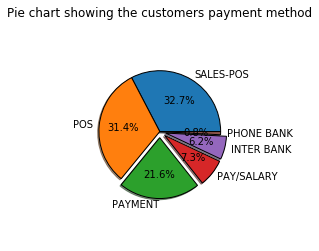

In [34]:
plt.subplot(1,2,2);
txn_values=[3934,3783,2600,883,742,101]
txn_labels=["SALES-POS","POS","PAYMENT","PAY/SALARY","INTER BANK","PHONE BANK"]
plt.axis("equal")
plt.title("Pie chart showing the customers payment method")
plt.pie(txn_values,labels=txn_labels,radius=1.0,autopct='%0.1f%%',shadow=True,explode=[0,0,0.1,0.1,0.1,0],wedgeprops={'edgecolor':'black'});

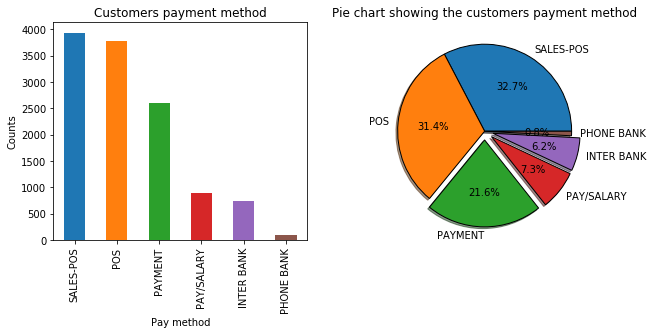

In [35]:
#Checking counts in our dataset with bar chart
plt.figure(figsize=(10,4))
plt.subplot(1,2,1);
anz.txn_description.value_counts().plot(kind='bar',title='Customers payment method',color=['C0','C1','C2','C3','C4','C5']);
plt.xlabel('Pay method')
plt.ylabel('Counts');

plt.subplot(1,2,2);
txn_values=[3934,3783,2600,883,742,101]
txn_labels=["SALES-POS","POS","PAYMENT","PAY/SALARY","INTER BANK","PHONE BANK"]
plt.axis("equal")
plt.title("Pie chart showing the customers payment method")
plt.pie(txn_values,labels=txn_labels,radius=1.0,autopct='%0.1f%%',shadow=True,explode=[0,0,0.1,0.1,0.1,0],wedgeprops={'edgecolor':'black'});



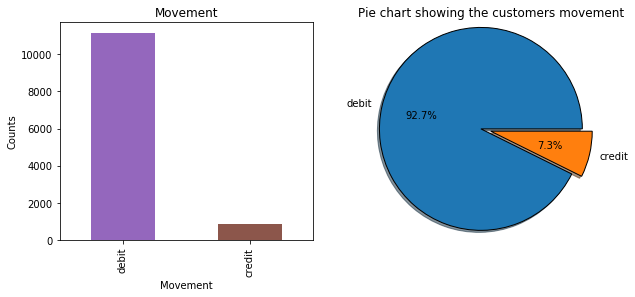

In [36]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1);
anz.movement.value_counts().plot(kind='bar',title='Movement',color=['C4','C5']);
plt.xlabel('Movement')
plt.ylabel('Counts');


plt.subplot(1,2,2);
mov_values=[11160,883]
mov_labels=["debit","credit"]
plt.axis("equal")
plt.title("Pie chart showing the customers movement")
plt.pie(mov_values,labels=mov_labels,radius=1.0,autopct='%0.1f%%',shadow=True,explode=[0.1,0],wedgeprops={'edgecolor':'black'});


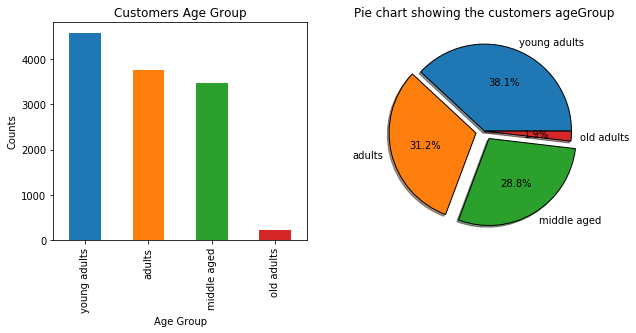

In [37]:
#Checking counts in our dataset with bar chart
plt.figure(figsize=(10,4))
plt.subplot(1,2,1);
anz.ageGroup.value_counts().plot(kind='bar',title='Customers Age Group',color=['C0','C1','C2','C3']);
plt.xlabel('Age Group')
plt.ylabel('Counts');


plt.subplot(1,2,2);
ageGroup_values=[4588,3758,3473,224]
ageGroup_labels=["young adults","adults","middle aged","old adults"]
plt.axis("equal")
plt.title("Pie chart showing the customers ageGroup")
plt.pie(ageGroup_values,labels=ageGroup_labels,radius=1.0,autopct='%0.1f%%',shadow=True,explode=[0,0.1,0.1,0],wedgeprops={'edgecolor':'black'});

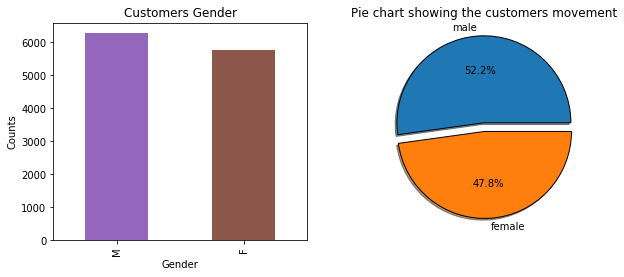

In [38]:
#Checking counts in our dataset with bar chart
plt.figure(figsize=(10,4))
plt.subplot(1,2,1);
anz.gender.value_counts().plot(kind='bar',title='Customers Gender',color=['C4','C5']);
plt.xlabel('Gender')
plt.ylabel('Counts');



plt.subplot(1,2,2);
gen_values=[6285,5758]
gen_labels=["male","female"]
plt.axis("equal")
plt.title("Pie chart showing the customers movement")
plt.pie(gen_values,labels=gen_labels,radius=1.0,autopct='%0.1f%%',shadow=True,explode=[0.1,0],wedgeprops={'edgecolor':'black'});


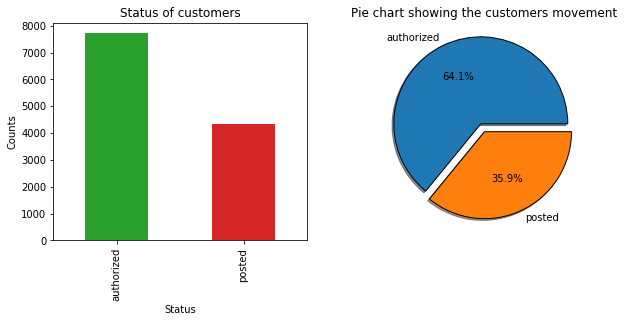

In [39]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1);
anz.status.value_counts().plot(kind='bar',title='Status of customers',color=['C2','C3']);
plt.xlabel('Status')
plt.ylabel('Counts');


plt.subplot(1,2,2);
gen_values=[7717,4326]
gen_labels=["authorized","posted"]
plt.axis("equal")
plt.title("Pie chart showing the customers movement")
plt.pie(gen_values,labels=gen_labels,radius=1.0,autopct='%0.1f%%',shadow=True,explode=[0.1,0],wedgeprops={'edgecolor':'black'});


In [40]:
age_of_passengers = anz.groupby("age").size()

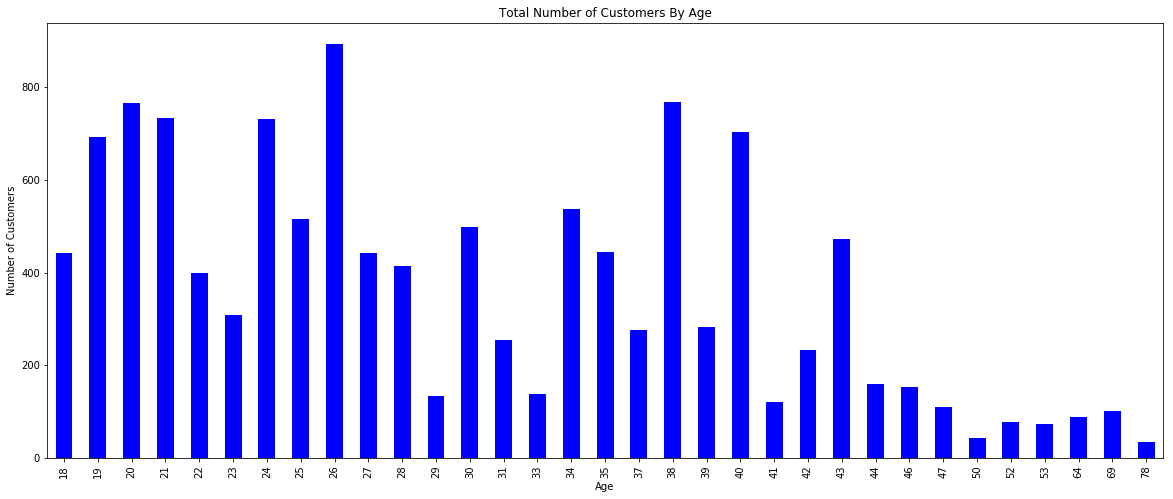

In [41]:
# Plot bar graph for Age of passengers on titanic like a normal distribution data

age_of_passengers.plot(kind = "bar", figsize = (20,8),color='blue')
plt.ylabel("Number of Customers")
plt.xlabel("Age")
plt.title("Total Number of Customers By Age")
plt.show()

### (2) Bivariate Exploration
To start off with, I want to look at the pairwise correlations present between features in the data.

Through these bivariates plots, we can learn how changes in one variable might affect the variable in the second, and identify clusters and patterns in the dataset.

In [42]:
numeric_vars = ['age', 'balance', 'amount']
categoric_vars = ['gender', 'status', 'movement','txn_description']

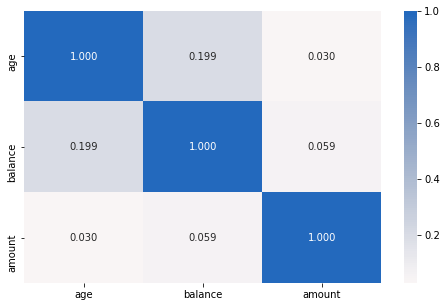

In [43]:
plt.figure(figsize = [8, 5])
sb.heatmap(anz[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

### The relationship between balance and the predictor variables

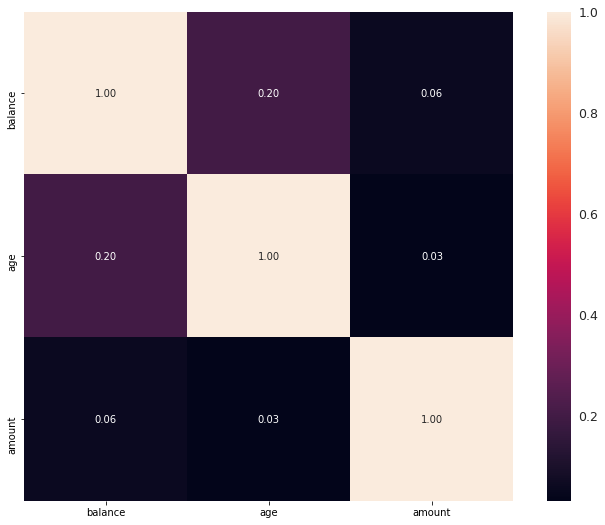

In [44]:
#balance correlation matrix

corrmat = anz.corr()
f, ax = plt.subplots(figsize=(12, 9))
k = 7 #number of variables for heatmap
cols = corrmat.nlargest(k, 'balance')['balance'].index
cm = np.corrcoef(anz[cols].values.T)
sb.set(font_scale=1.25)
hm = sb.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

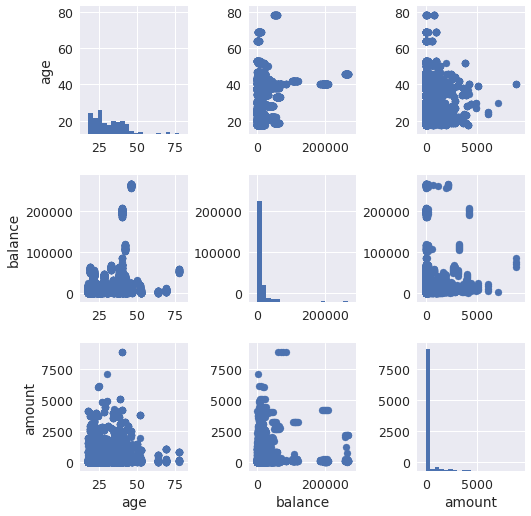

In [45]:
# plot matrix: checking relationship between the numerical variables in the dataset

g = sb.PairGrid(data = anz, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

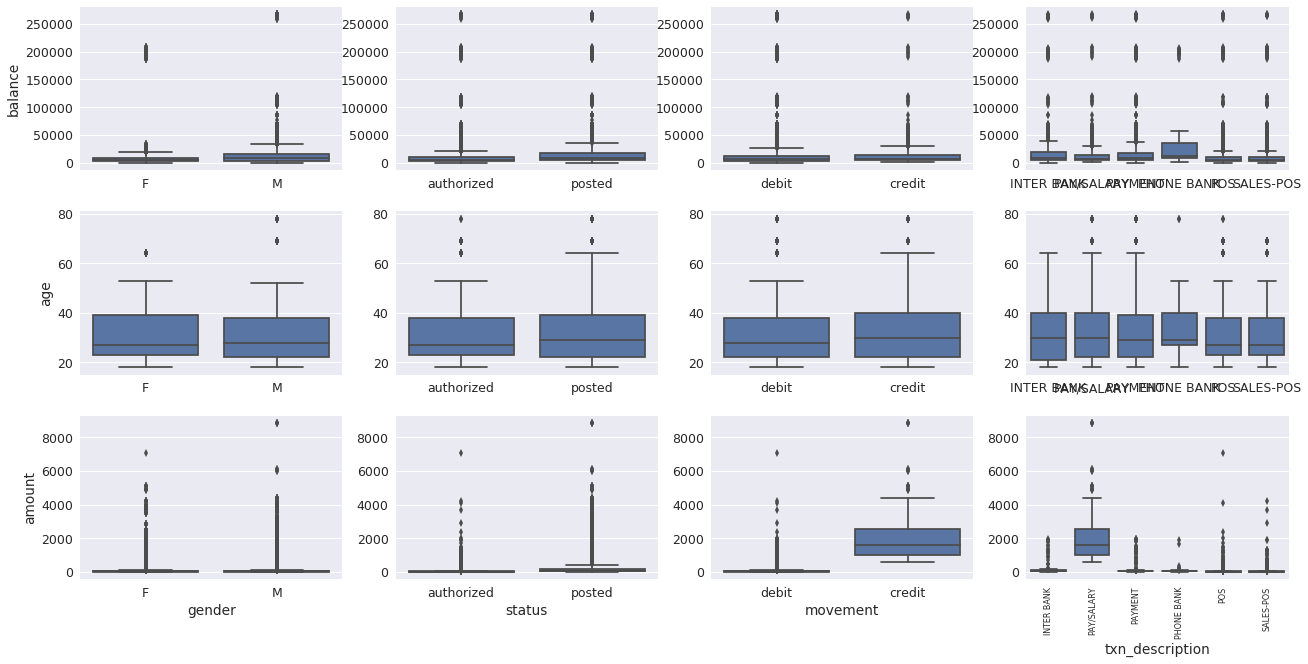

In [46]:
# plot matrix of numeric features against categorical features.
# can use a larger sample since there are fewer plots and they're simpler in nature.


def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [90, 90])
g = sb.PairGrid(data = anz, y_vars = ['balance', 'age', 'amount'], x_vars = categoric_vars,
                size = 3, aspect = 1.5)
g.map(boxgrid)
plt.xticks(rotation='vertical',size=8)
plt.show();

In [47]:
#grouping two categorical variables together(sex and survived)
bymon=anz.groupby("month").txn_description.value_counts()
bymon

month      txn_description
August     SALES-POS          1309
           POS                1226
           PAYMENT             837
           PAY/SALARY          298
           INTER BANK          240
           PHONE BANK           33
October    SALES-POS          1318
           POS                1263
           PAYMENT             896
           PAY/SALARY          313
           INTER BANK          262
           PHONE BANK           35
September  SALES-POS          1307
           POS                1294
           PAYMENT             867
           PAY/SALARY          272
           INTER BANK          240
           PHONE BANK           33
Name: txn_description, dtype: int64

In [48]:
#plotting clustered bar chart of gender vs survived
bymon=bymon.reset_index(name='count')
bymon.pivot(index='month',columns='txn_description',values='count')

txn_description  INTER BANK  PAY/SALARY  PAYMENT  PHONE BANK   POS  SALES-POS
month                                                                        
August                  240         298      837          33  1226       1309
October                 262         313      896          35  1263       1318
September               240         272      867          33  1294       1307

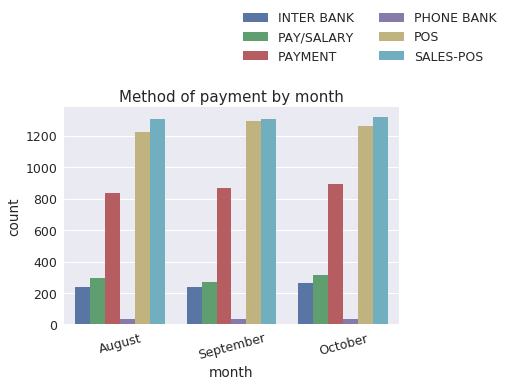

In [49]:
sb.countplot(data=anz,x='month',hue='txn_description')
plt.xticks(rotation=15)
plt.legend(loc="lower left", bbox_to_anchor=(0.5, 1.15), ncol=2)

plt.title('Method of payment by month');

## PREDICTION AND VISUALIZATION

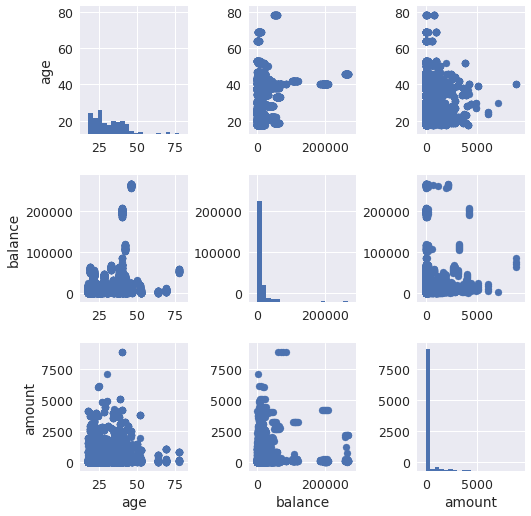

In [50]:
# plot matrix: checking relationship between the numerical variables in the dataset

g = sb.PairGrid(data = anz, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

**The relationship between balance and the predictor variables**

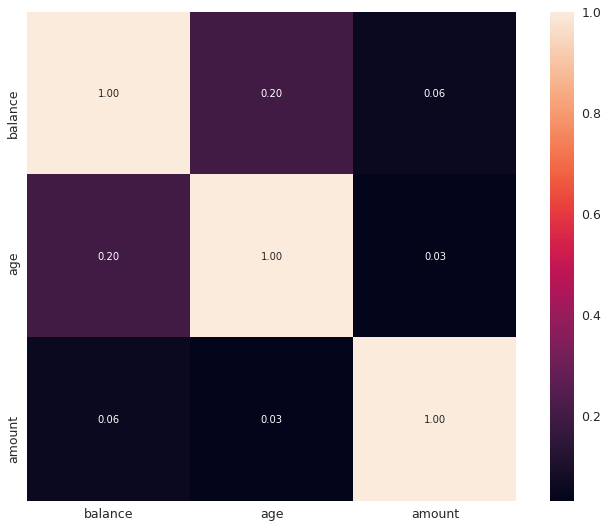

In [51]:
#balance correlation matrix

corrmat = anz.corr()
f, ax = plt.subplots(figsize=(12, 9))
k = 7 #number of variables for heatmap
cols = corrmat.nlargest(k, 'balance')['balance'].index
cm = np.corrcoef(anz[cols].values.T)
sb.set(font_scale=1.25)
hm = sb.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

#### REGRESSION MODEL

In [52]:
X=anz[['amount','age']]
y=anz['balance']

In [53]:
import sklearn
from sklearn.model_selection import train_test_split

In [54]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
reg=LinearRegression()

In [57]:
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [58]:
print('Intercept:' , reg.intercept_)
print('Coefficients:', reg.coef_)

Intercept: -4775.18496708
Coefficients: [   2.87620173  617.57405854]


- balance = (Intercept) + (amount)*X1 + (age)*X2

- balance = (-4258.25503093) + (2.74776406)*X1 + (594.43284399)*X2


**Predicting with the model**

In [59]:
pred=reg.predict(X_train)
pred

array([ 18725.64805331,  14450.25954417,  34766.29427358, ...,
        10198.25455508,  11937.30923836,  20711.81313431])

**Using sklearn approach**


In [60]:
from sklearn import linear_model
import statsmodels.api as sm

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [61]:
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, y)

print('Intercept:', regr.intercept_)
print('Coefficients:', regr.coef_)


# with statsmodels
x = sm.add_constant(X) # adding a constant
 
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: -4790.64957949
Coefficients: [   2.83086356  620.05840614]
                            OLS Regression Results                            
Dep. Variable:                balance   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     1620.
Date:                Sun, 06 Sep 2020   Prob (F-statistic):               0.00
Time:                        22:38:05   Log-Likelihood:            -1.4158e+05
No. Observations:               12043   AIC:                         2.832e+05
Df Residuals:                   12041   BIC:                         2.832e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

**The part displays a comprehensive table with statistical info generated by statsmodels.**

*This information can provide you additional insights about the model used (such as the fit of the model, standard errors, etc):*

**Using statsmodels**

In [62]:
import statsmodels.api as sm # import statsmodels 

X = anz[["amount","age"]] ## X usually means our input variables (or independent variables)
y = anz["balance"] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                balance   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     267.6
Date:                Sun, 06 Sep 2020   Prob (F-statistic):          1.89e-114
Time:                        22:38:05   Log-Likelihood:            -1.4157e+05
No. Observations:               12043   AIC:                         2.831e+05
Df Residuals:                   12040   BIC:                         2.832e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4790.6496    902.390     -5.309      0.000   -6559.479   -3021.820
amount         2.8309      0.474      5.969      0.000       1.901       3.761
age          620.0584     27.976     22.164      0.000     565.220     674.896
==============================================================================
Omnibus:                    12225.177   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           560963.953
Skew:                           5.207   Prob(JB):                         0.00
Kurtosis:                      34.772   Cond. No.                     2.00e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Interpreting the Output 
We can see here that this model has a very low R-squared value of 4%, meaning that this model explains 4% of the variance in our dependent variable. Whenever we add variables to a regression model, R² will be higher, but this is a pretty low R². We can see that both amount and age are statistically significant in predicting (or estimating) the median balance; we see that as amount increases by 1, balance will increase by 2.8309 keeping age constant, and when age increases by 1, balance will increase by 620.0584 keeping amount constant.



**Closing Thoughts**

- There's a value corresponding to R-Squared. R-squared is the “percent of variance explained” by the model. That is, R-squared is the fraction by which the variance of the errors is less than the variance of the dependent variable. R-squared values range from 0 to 1 and are commonly stated as percentages from 0% to 100%. R-squared will give you an estimate of the relationship between movements of a dependent variable based on an independent variable's movements. It doesn't tell you whether your chosen model is good or bad, nor will it tell you whether the data and predictions are biased. A high or low R-square isn't necessarily good or bad, as it doesn't convey the reliability of the model, nor whether you've chosen the right regression. You can get a low R-squared for a good model, or a high R-square for a poorly fitted model, and vice versa.

- The coefficients estimate the trends while R-squared represents the scatter around the regression line. The interpretations of the significant variables are the same for both high and low R-squared models. Low R-squared values are problematic when you need precise predictions.
So, what’s to be done if you have significant predictors but a low R-squared value? I can hear some of you saying, "add more variables to the model!"

- In some cases, it’s possible that additional predictors can increase the true explanatory power of the model. However, in other cases, the data contain an inherently higher amount of unexplainable variability. For example, many psychology studies have R-squared values less that 50% because people are fairly unpredictable.

In [63]:
# Try to predict the y ( balance) for the test data-features(independentvariables(x_test))
predictions=reg.predict(X_test)


In [64]:
# Accuracy of the prediction
confidence = reg.score(X_test, y_test)
print("This is predicted Values",predictions)
print("This is the prediction accuracy",confidence)

This is predicted Values [ 19988.17761086  18730.99778853  12603.17472393 ...,  21833.53671005
  12590.95086658  10682.86180767]
This is the prediction accuracy 0.0426455829736


Text(0,0.5,'balance_Predict')

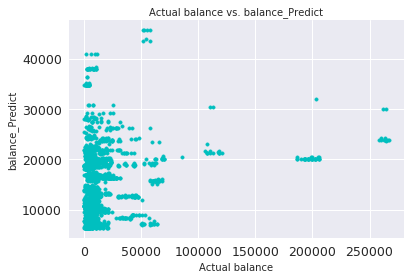

In [65]:
plt.legend(loc=4)
plt.title("Actual balance vs. balance_Predict", size=10)
plt.scatter(y_test,predictions,color='c', marker='.')
plt.xlabel("Actual balance", size=10)
plt.ylabel("balance_Predict", size=10)

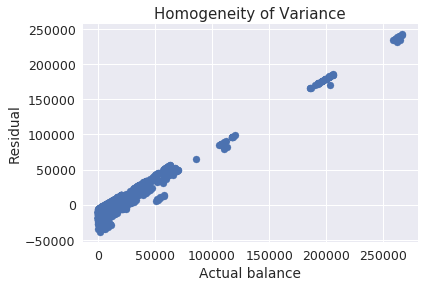

In [66]:
plt.legend(loc=4)
plt.title("Homogeneity of Variance")
plt.scatter(y_test,y_test-predictions)
plt.xlabel("Actual balance")
plt.ylabel("Residual")
plt.show()


In [67]:
from sklearn.model_selection import train_test_split,KFold,cross_val_score,cross_val_predict


In [68]:
mod=reg.fit(X_train,y_train)

In [69]:
from sklearn import preprocessing,svm
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection,metrics


This is R2 0.039678856176


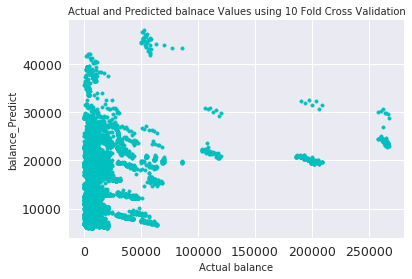

In [70]:
predictions2=cross_val_predict(mod,X,y,cv=10)
#Check the R2- the proportion of variance in the dependent variable explained by the predictors
accuracy=metrics.r2_score(y,predictions2)
print ("This is R2",accuracy)
plt.scatter(y,predictions2,color='c', marker='.')
plt.legend(loc=4)
plt.xlabel("Actual balance", size=10)
plt.ylabel("balance_Predict", size=10)
plt.title("Actual and Predicted balnace Values using 10 Fold Cross Validation",size=10)
plt.show()


**Making new prediction with new data set from the model**

In [75]:
# prediction with sklearn
age = 25
amount = 45.3
print ('balance:', regr.predict([[age,amount]]))


balance: [ 23368.7678079]


**This part displays the predicted output using sklearn:**

- Multiple Linear Regression

Imagine that you want to predict the balance after you collected the following data:

age = 25 (i.e., X1= 25)
amount = 45.3 (i.e., X2= 45.3)

*If you plug that data into the regression equation, you’ll get the same predicted result as displayed in the second part:*
- balance = (Intercept) + (amount)X1 + (age)X2

balance = (-4258.25503093) + (2.74776406)*(25) + (594.43284399)*(45.3) = 23368.7678079